## Daniel Barella
## 10/3/25

# 📘 Day 29 – Clustering: K-Means & Hierarchical

## 🌱 Core Concepts

- Clustering = unsupervised learning to find natural groupings in data.

- K-Means: partitions data into k clusters minimizing within-cluster variance.

- Hierarchical clustering: builds a hierarchy of clusters (dendrogram).

- Choosing k: use the Elbow Method or Silhouette Score.

- Applications: customer segmentation, anomaly detection, feature learning.

## 🧪 Practice Code – K-Means on Iris Dataset

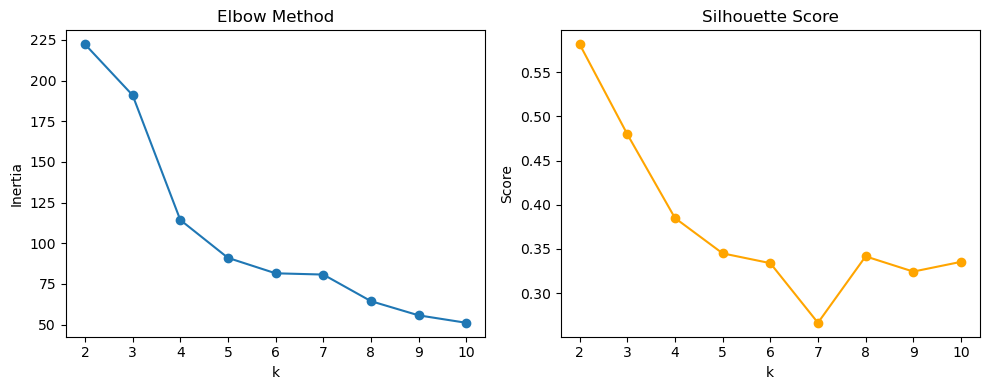

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load data
iris = load_iris(as_frame=True)
X = iris.data

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different k values
inertia = []
silhouette = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow method
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')

# Plot silhouette score
plt.subplot(1,2,2)
plt.plot(range(2, 11), silhouette, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


## 🎯 Mini Project – Customer Segmentation with K-Means

### Goal:
Cluster mall customers based on spending behavior and demographics.

### Dataset:
Use the Mall Customers dataset:

In [14]:
!pip install kagglehub --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 786.1 kB/s eta 0:00:00MB/s eta 0:00:01


In [15]:
import kagglehub
import pandas as pd

# Download the dataset from Kaggle
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

# Load the CSV file
file_path = f"{path}/Mall_Customers.csv"
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully!")
print(df.head())


100%|███████████████████████████████████████| 1.55k/1.55k [00:00<00:00, 375kB/s]

Extracting files...
✅ Dataset loaded successfully!
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## Tasks:

1. Load and inspect dataset.

2. Scale numerical features.

3. Apply K-Means clustering (try 3–7 clusters).

4. Use Elbow Method and Silhouette Score to pick optimal k.

5. Visualize clusters using Age vs Spending Score.

6. Reflect: what groups emerge? How might a business use these clusters?

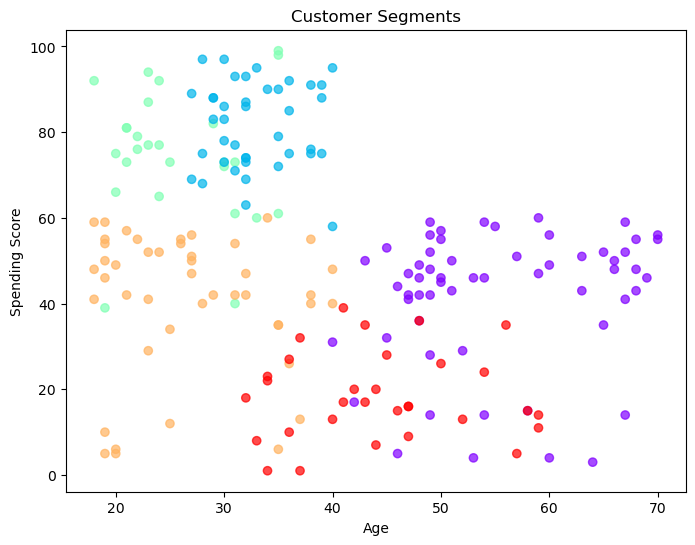

Silhouette Score: 0.40846873777345605


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load data
#url = "https://www.kaggle.com/api/v1/datasets/download/vjchoudhary7/customer-segmentation-tutorial-in-python"
#df = pd.read_csv(url)

# Select relevant columns
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose k (use elbow method if unsure)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = kmeans.labels_

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()

# Evaluate clustering
print("Silhouette Score:", silhouette_score(X_scaled, kmeans.labels_))


💡 Reflection — What Groups Emerge

From your scatterplot:

Top left (light blue/green): Younger customers with high spending — your ideal or trend-loving shoppers.

Bottom right (purple): Older customers with low spending — steady or conservative shoppers.

Middle clusters (orange/red): Middle-aged customers with moderate spending — possibly family-oriented or practical buyers.

💼 Business Use Cases

A business could:

Target high-spending younger groups with new product launches or premium offers.

Offer loyalty programs to middle spenders to increase retention.

Provide discounts or essentials to low-income/low-spending clusters to keep them engaged.

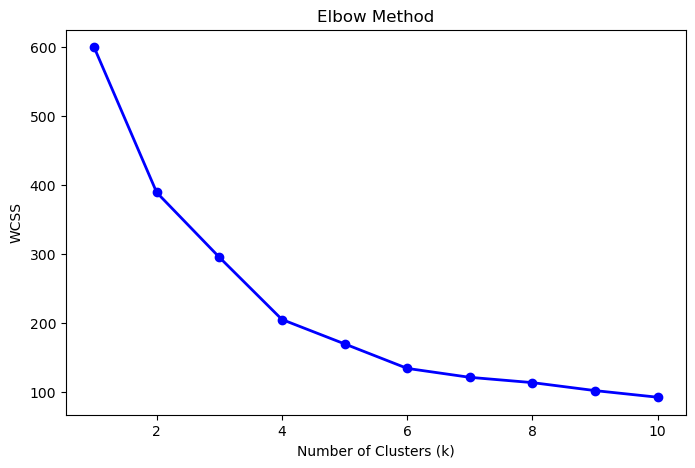

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

wcss = []  # within-cluster sum of squares
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-', linewidth=2)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()


👉 Interpretation:
Look for the “elbow” point where the line bends sharply — that’s your best k (often 4–6 for this dataset).

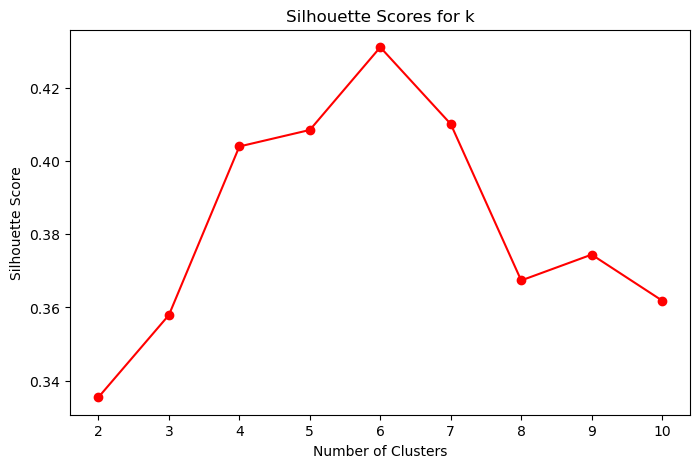

In [18]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, 'ro-')
plt.title('Silhouette Scores for k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


👉 The peak of this line = best cluster number for separation and compactness.

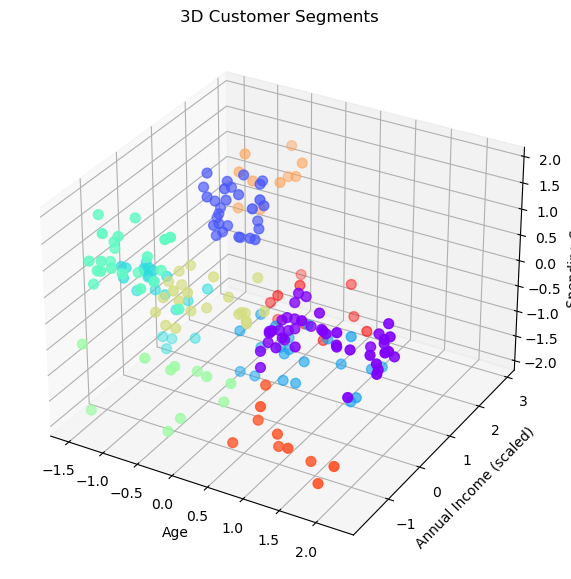

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_scaled[:, 0],  # Age
    X_scaled[:, 1],  # Income
    X_scaled[:, 2],  # Spending Score
    c=kmeans.labels_, cmap='rainbow', s=50
)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (scaled)')
ax.set_zlabel('Spending Score')
ax.set_title('3D Customer Segments')
plt.show()


In [20]:
import pandas as pd
import numpy as np

# Get the cluster centers (in scaled space)
centroids = kmeans.cluster_centers_

# Convert back to original units
centroids_unscaled = scaler.inverse_transform(centroids)

# Create a DataFrame for easy interpretation
centroids_df = pd.DataFrame(centroids_unscaled, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
centroids_df['Cluster'] = range(len(centroids_df))
centroids_df = centroids_df.round(1)
centroids_df


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,56.7,53.5,49.0,0
1,32.9,78.6,82.2,1
2,46.0,80.3,16.8,2
3,21.0,63.2,40.7,3
4,25.3,25.7,79.4,4
5,34.1,23.5,25.5,5
6,33.4,53.1,50.3,6
7,32.2,109.7,82.0,7
8,55.2,26.9,13.0,8
9,41.0,109.7,22.0,9
